In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
dir_path

'/home/romanov/eic/kak-bog-cherepahu/simulation'

In [2]:
# Load geometry file
ecal_info = gdml_read_ecal_info(f"{dir_path}/wall_only.gdml")

# ecal_info is of EcalGeoInfo class, which is a helper holding information
# about all needed ecal geometries.
# Print what information it holds:
ecal_info.print()

# Data file name
#data_file_name = f"{dir_path}/data/test_gun.edm4hep.root"
#data_file_name = f"{dir_path}/../disk_gun_electrons_0-15GeV_100000ev.edm4hep.root"
#data_file_name = f"{dir_path}/../2022-11-22_pgun_pi-_wall_only_e0.01-30GeV_alldir_1prt_100evt.edm4hep.root"

module_size_x    : 2.0
module_size_y    : 2.0
module_size_z    : 20.0
total_modules    : 169
num_modules_x    : 13
num_modules_y    : 13
min_x            : -12.299999999999999
max_x            : 12.299999999999999
min_y            : -12.299999999999999
max_y            : 12.299999999999999
min_z            : 0.0
max_z            : 0.0
border_left      : -13.299999999999999
border_right     : 13.299999999999999
border_top       : 13.299999999999999
border_bottom    : -13.299999999999999
unit             : cm


In [3]:
data_file_name = f"{dir_path}/2022-11-22_pgun_e-_wall_only_e0.01-10GeV_center_1prt_10000evt.edm4hep.root"
# Open root file and get "events" tree from it
tree = uproot.open(data_file_name)["events"]

# Number of events to process:
entry_start = 0                  # (!) Try changing those
entry_stop = 100000                # <==

def get_flatten_branch_data(branch_name):
    """ Simple helper function to read events and flatten the results"""
    data = tree[branch_name].array(entry_start=entry_start, entry_stop=entry_stop)
    data = ak.flatten(data).to_numpy()
    return data

def plot_branch_h1(branch_name, title, ax, bins, limit, mask=None):
    """ Helper plots 1d histogram by branch name. Data gets flatten in process"""
    data = get_flatten_branch_data(branch_name)
    if mask is not None:
        data = data[mask]
    hst_1d = hist.Hist(hist.axis.Regular(bins=bins, start=limit[0], stop=limit[1], name=title))
    hst_1d.fill(data)
    return hst_1d,hst_1d.plot(ax=ax)


# Read energies, x and y positions
# Flatten arrays for simplicity
energies = get_flatten_branch_data('WallECalHits/WallECalHits.energy')
hits_x = get_flatten_branch_data('WallECalHits/WallECalHits.position.x')
hits_y = get_flatten_branch_data('WallECalHits/WallECalHits.position.y')

In [4]:
# Uncomment this to see all values:
#tree.show()

names = [key for key in tree.keys() if "MC" in key]
names


['MCParticles',
 'MCParticles/MCParticles.PDG',
 'MCParticles/MCParticles.generatorStatus',
 'MCParticles/MCParticles.simulatorStatus',
 'MCParticles/MCParticles.charge',
 'MCParticles/MCParticles.time',
 'MCParticles/MCParticles.mass',
 'MCParticles/MCParticles.vertex.x',
 'MCParticles/MCParticles.vertex.y',
 'MCParticles/MCParticles.vertex.z',
 'MCParticles/MCParticles.endpoint.x',
 'MCParticles/MCParticles.endpoint.y',
 'MCParticles/MCParticles.endpoint.z',
 'MCParticles/MCParticles.momentum.x',
 'MCParticles/MCParticles.momentum.y',
 'MCParticles/MCParticles.momentum.z',
 'MCParticles/MCParticles.momentumAtEndpoint.x',
 'MCParticles/MCParticles.momentumAtEndpoint.y',
 'MCParticles/MCParticles.momentumAtEndpoint.z',
 'MCParticles/MCParticles.spin.x',
 'MCParticles/MCParticles.spin.y',
 'MCParticles/MCParticles.spin.z',
 'MCParticles/MCParticles.colorFlow.a',
 'MCParticles/MCParticles.colorFlow.b',
 'MCParticles/MCParticles.parents_begin',
 'MCParticles/MCParticles.parents_end',
 'MC

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f19a3279040>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f19a32794f0>, text=[])

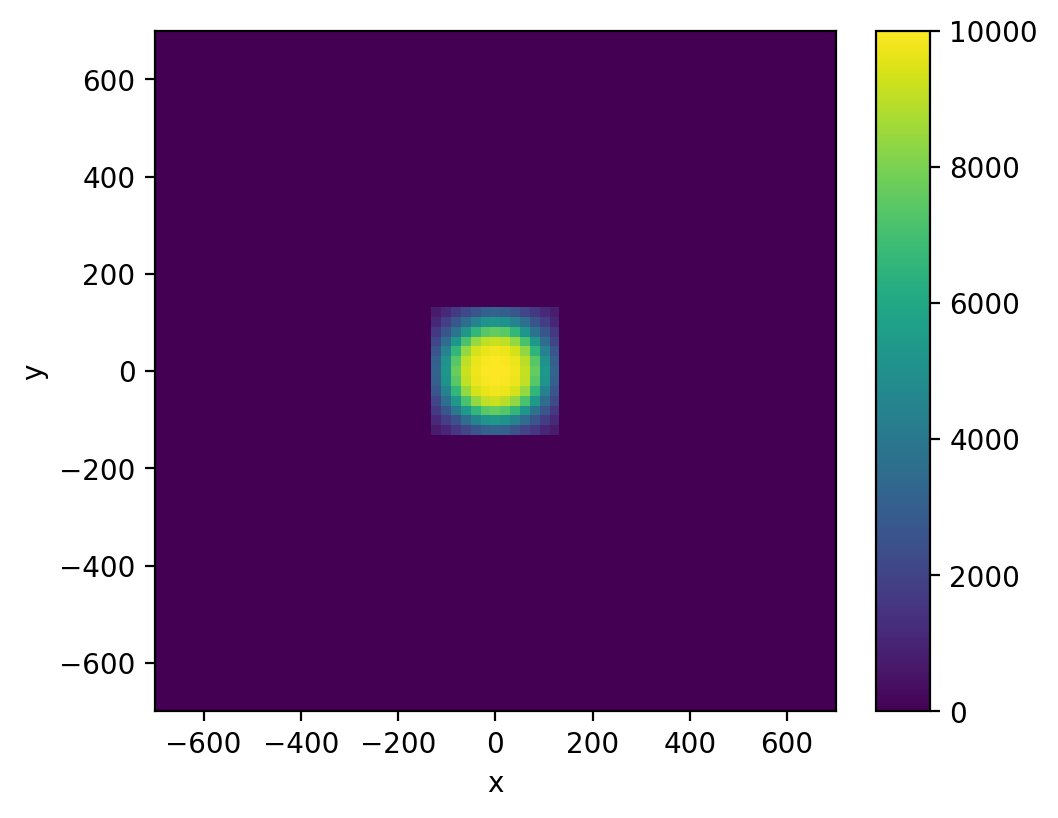

In [5]:
# Build the histogram
# noinspection PyTypeChecker
hits_h2d = hist.Hist(
    hist.axis.Regular(bins=69, start=-700, stop=700, name="x"),
    hist.axis.Regular(bins=69, start=-700, stop=700, name="y"),)

hits_h2d.fill(hits_x, hits_y)

fig, ax = plt.subplots(figsize=(5,5))
ax.autoscale()
ax.axis('equal')
hits_h2d.plot2d(ax=ax)

(Hist(Regular(100, 1, 20, name='pz', label='pz'), storage=Double()) # Sum: 9048.0 (10000.0 with flow),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1951fd0df0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

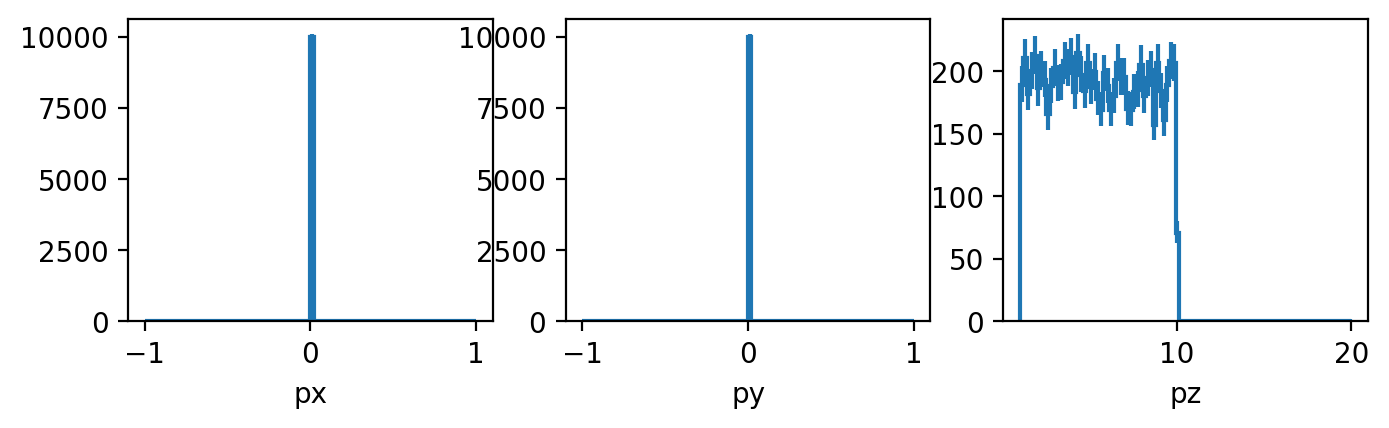

In [6]:
# Read true particle momentums
generatorStatus = get_flatten_branch_data('MCParticles/MCParticles.generatorStatus')
stable_only = generatorStatus > 0
# Fill histograms
fig, axs = plt.subplots(1,3, figsize=(8,2))

plot_branch_h1('MCParticles/MCParticles.momentum.x', 'px', axs[0], 100, (-1,1), stable_only)
plot_branch_h1('MCParticles/MCParticles.momentum.y', 'py', axs[1], 100, (-1,1), stable_only)
plot_branch_h1('MCParticles/MCParticles.momentum.z', 'pz', axs[2], 100, (1, 20), stable_only)

(Hist(Regular(100, -2000, 1800, name='vtx_z', label='vtx_z'), storage=Double()) # Sum: 10000.0,
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1958302b50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

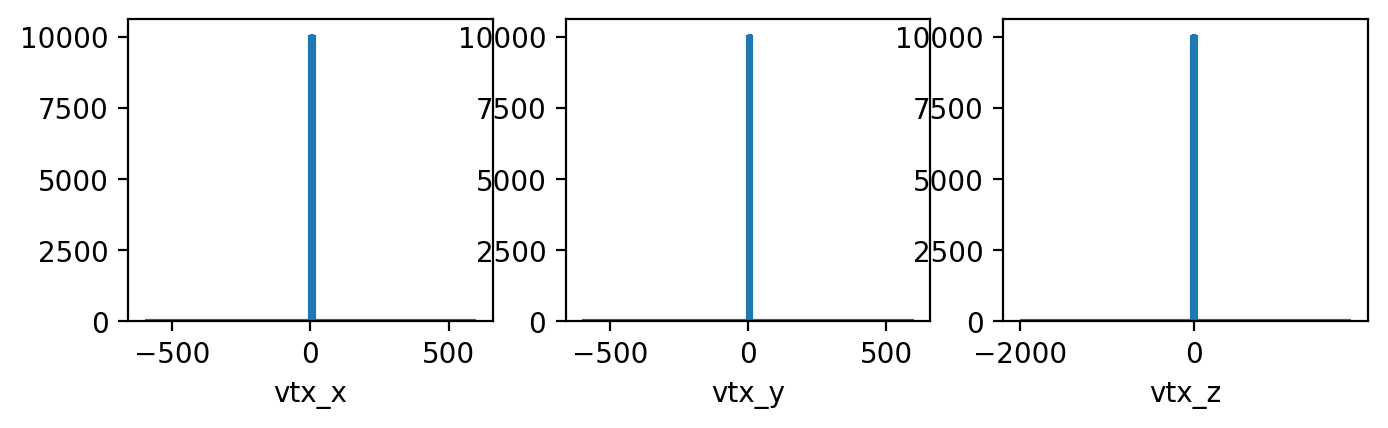

In [7]:
fig, axs = plt.subplots(1,3, figsize=(8,2))
plot_branch_h1('MCParticles/MCParticles.vertex.x', 'vtx_x', axs[0], 100, (-600,600), stable_only)
plot_branch_h1('MCParticles/MCParticles.vertex.y', 'vtx_y', axs[1], 100, (-600,600), stable_only)
plot_branch_h1('MCParticles/MCParticles.vertex.z', 'vtx_z', axs[2], 100, (-2000,1800), stable_only)

(Hist(Regular(100, 0, 2000, name='endpoint z', label='endpoint z'), storage=Double()) # Sum: 9778.0 (10000.0 with flow),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1958194b80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

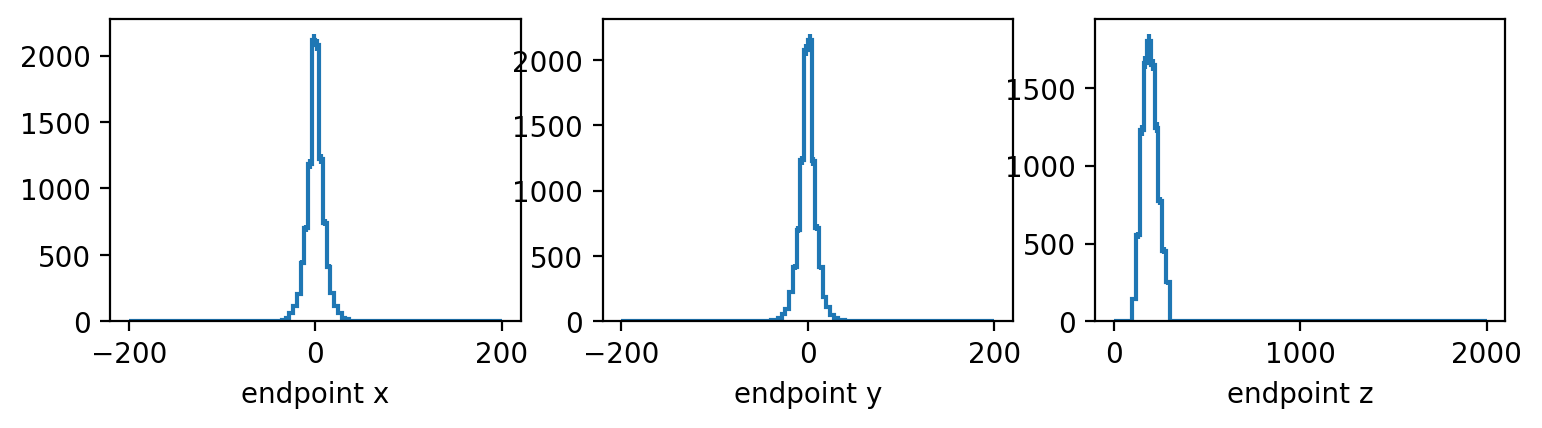

In [8]:
fig, axs = plt.subplots(1,3, figsize=(9,2))
plot_branch_h1('MCParticles/MCParticles.endpoint.x', 'endpoint x', axs[0], 100, (-200,200), stable_only)
plot_branch_h1('MCParticles/MCParticles.endpoint.y', 'endpoint y', axs[1], 100, (-200,200), stable_only)
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', axs[2], 100, (0, 2000), stable_only)

(Hist(Regular(200, 0, 500, name='endpoint z', label='endpoint z'), storage=Double()) # Sum: 9775.0 (10000.0 with flow),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f19580c2a90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

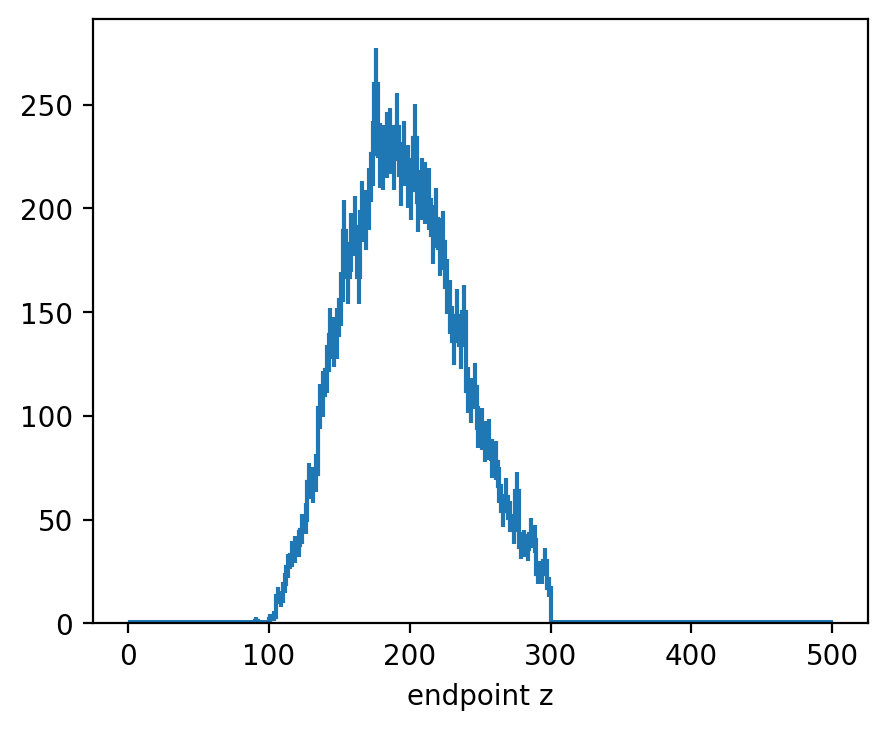

In [9]:
fig, ax = plt.subplots(figsize=(5,4))
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', ax, 200, (0,500), stable_only)

/home/romanov/anaconda3/envs/ai/lib/python3.9/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


(Hist(Regular(200, -2100, -1900, name='endpoint z', label='endpoint z'), storage=Double()) # Sum: 0.0 (10000.0 with flow),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1958020d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

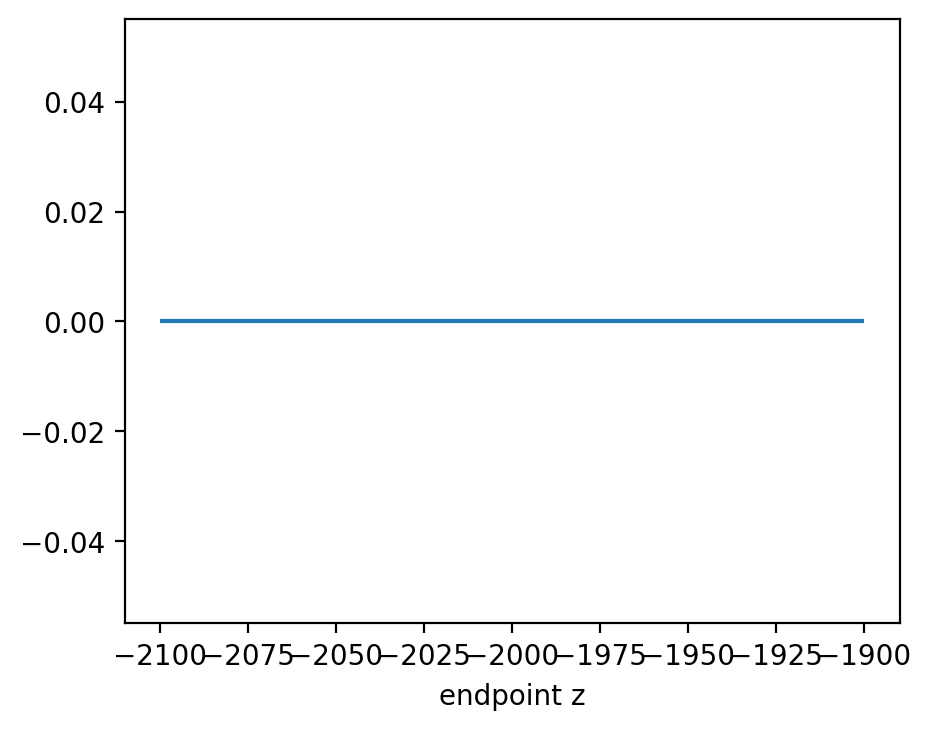

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', ax, 200, (-2100, -1900), stable_only)

In [11]:
vtx_x = tree['MCParticles/MCParticles.vertex.x'].array(entry_start=entry_start, entry_stop=entry_stop)